<a href="https://colab.research.google.com/github/neto-riga/metodos_numericos_2/blob/main/9_spline_cubico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)

# Ejercicio 9. Ajuste con spline cúbico
---

La siguiente tabla presenta los puntos sobre el dibujo de la ballena.

|Pto|$i$|$x_{i}$|$y_{i}$|
|---|---|--------|-----|
|C|0|3.08|0.36|
|D|1|2.58|2.12|
|E|2|0.92|2.38|
|F|3|1.86|3.24|
|G|4|2.76|3.04|
|H|5|3|3.72|
|I|6|4|4|
|J|7|4.02|2.46|
|K|8|3.56|1.58|
|L|9|4.98|1.5|
|M|10|6.94|3.3|
|N|11|9.02|3.74|
|O|12|10.22|2.96|
|P|13|9.98|0.62|
|Q|14|8.98|0.66|
|R|15|8.1|0.46|
|S|16|7.62|0.78|

* Realizar un ajuste polinomial con spline cpubicos para trazar el perfil del dibujo.
* Presentar tablas y sistemas de ecuaciones. 
* Agregar puntos, si es necesario.
* Construir los polinomios de ajuste.
*Graficar el perfil resultante.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import seaborn as sns
from IPython.display import display
sns.set_theme()

Implementamos el método para poder calcular cada unos de los coeficientes $a_{i}$, $b_{i}$ y $c_{i}$. A demás del sistema y las soluciones $S_{i}$

In [ ]:
def main_splines(x, fx):
  h = []
  for i in range(len(x) - 1):
    h.append(x[i+1] - x[i])
  
  f0 = []
  for i in range(len(x)-1):
    f0.append((fx[i+1] - fx[i]) / h[i])
  
  sis = np.zeros((len(x)-2,len(x)-2))

  for i in range (len(x)-3):
    sis [i,i+1] = sis [i+1,i] = h[i+1]

  r=[]
  for i in range(len(x)-2):
    r.append(6*(f0[i+1]-f0[i]))
    for j in range(len(x)-2):
      if i==j:
        sis[i,j] = 2*(h[i+1]+h[i])

  fs = np.zeros(len(x)-2).reshape(len(x)-2,1)
  for i, f in enumerate(fs):
    f[0] = 6 * (f0[i+1] - f0[i])
  sol = np.dot(np.linalg.inv(sis),r)
  sol = sol.reshape(len(sol),)
  sol = np.insert(sol, 0, 0)
  sol = np.append(sol, 0)
  a_s = []
  bs = []
  cs = []
  for i in range(len(x)-1):
    a_s.append((sol[i+1]-sol[i])/(6*h[i]))
    bs.append(sol[i]/2)
    cs.append(f0[i] - ((sol[i+1]+2*sol[i])/6)*h[i])
  return a_s, bs, cs,sol,sis

Calculamos los coeficientes para los polinomios. Para poder graficar la ballena optamos por dividir la lista de $x_{i}$ y $y_{i}$ en ocho sublistas. 
A demás, agregamos los siguientes puntos.

Entre C y D se agregó:

|x|y|
|--|--|
|2.52|2.06|
|2.52|2.06|
|1.6|1.9|

Entre E y F

|x|y|
|--|--|
|1.5|2.5|

Entre H e I:

|x|y|
|-|-|
|3.9|3.92|

Entre I y L:

|x|y|
|--|--|
|4.15|3.9|
|4.2|3.8|
|4.25|3.5|
|4.3|3.1|

Además se agregaron los siguientes puntos:
 
|x|y|
|--|--|
|10.3|2.8|
|10.33|2.7|
|10.36|2.3|
|10.4|1.5| 

A continuación se muestran los resultados obtenidos, así como los sistemas utilizados.

In [ ]:
x = []
y = []

x.append([3.08, 2.73, 2.58, 2.52, 1.6, 0.92])
y.append([0.36, 0.95, 2.12, 2.06, 1.9, 2.38])
x.append([0.92, 1.5, 1.86, 2.76])
y.append([2.38, 2.5, 3.24, 3.04])
x.append([2.76, 3, 3.9, 4])
y.append([3.04, 3.72, 3.92, 4])
x.append([4, 4.15,4.2, 4.25,4.3])
y.append([4, 3.9,3.8, 3.5,3.1])
x.append([4.3, 4.02, 3.3])
y.append([3.1, 2.46, 2.15])
x.append([3.30, 3.56, 4.98, 6.94, 9.02, 10.22,10.3])
y.append([2.15, 1.58, 1.50, 3.30, 3.74, 2.96,2.8])
x.append([10.3, 10.33,10.36,10.38,10.39,10.4])
y.append([2.8, 2.7,2.5,2.3,1.9,1.5])
x.append([7.62, 8.1, 8.98, 9.98, 10.32,10.4])
y.append([0.78, 0.46, 0.66, 0.62, 1,1.5])

a = []
b = []
c = []
s=[]
for i, listax in enumerate(x):
  ss = np.zeros((len(listax)-2,len(listax)-2))
  tempa, tempb, tempc,s,ss = main_splines(listax, y[i])
  tempa.append(0)
  tempb.append(0)
  tempc.append(0)
  a.append(tempa)
  b.append(tempb)
  c.append(tempc)
  coef = {'x': listax,
          'f(x) = d': y[i],
          's': s,
          'a': a[i], 
          'b': b[i], 
          'c': c[i]}
  df =pd.DataFrame(coef)
  print(f'\n\nSpline cúbico para el grupo {i+1} de (x,y): \n')
  print("Sistema: \n")
  display(sp.Matrix(ss).evalf(3))
  print("\nCoeficientes\n")
  display(df)




Spline cúbico para el grupo 1 de (x,y): 

Sistema: 



Matrix([
[ -1.0, -0.15,     0,     0],
[-0.15, -0.42, -0.06,     0],
[    0, -0.06, -1.96, -0.92],
[    0,     0, -0.92,  -3.2]])


Coeficientes



,x,f(x) = d,s,a,b,c
0,3.08,0.36,0.000000,-28.024339,0.000000,1.747267
1,2.73,0.95,58.851112,229.578259,29.425556,-8.551677
2,2.58,2.12,-147.769321,-430.629965,-73.884661,-1.882812
3,2.52,2.06,7.257466,1.393908,3.628733,2.332544
4,1.60,1.90,-0.436905,-0.107085,-0.218453,-0.804914
5,0.92,2.38,0.000000,0.000000,0.000000,0.000000




Spline cúbico para el grupo 2 de (x,y): 

Sistema: 



Matrix([
[1.88, 0.36],
[0.36, 2.52]])


Coeficientes



,x,f(x) = d,s,a,b,c
0,0.92,2.38,0.000000,2.049891,0.000000,-0.482687
1,1.50,2.50,7.133621,-6.285180,3.566810,1.586063
2,1.86,3.24,-6.442369,1.193031,-3.221185,1.710489
3,2.76,3.04,0.000000,0.000000,0.000000,0.000000




Spline cúbico para el grupo 3 de (x,y): 

Sistema: 



Matrix([
[2.28, 0.9],
[ 0.9, 2.0]])


Coeficientes



,x,f(x) = d,s,a,b,c
0,2.76,3.04,0.000000,-6.380247,0.000000,3.200836
1,3.00,3.72,-9.187556,2.788016,-4.593778,2.098329
2,3.90,3.92,5.867733,-9.779556,2.933867,0.604409
3,4.00,4.00,0.000000,0.000000,0.000000,0.000000




Spline cúbico para el grupo 4 de (x,y): 

Sistema: 



Matrix([
[ 0.4, 0.05,    0],
[0.05,  0.2, 0.05],
[   0, 0.05,  0.2]])


Coeficientes



,x,f(x) = d,s,a,b,c
0,4.00,4.0,0.000000,-6.896552,0.000000,-0.511494
1,4.15,3.9,-6.206897,-347.126437,-3.103448,-0.977011
2,4.20,3.8,-110.344828,259.770115,-55.172414,-3.890805
3,4.25,3.5,-32.413793,108.045977,-16.206897,-7.459770
4,4.30,3.1,0.000000,0.000000,0.000000,0.000000




Spline cúbico para el grupo 5 de (x,y): 

Sistema: 



Matrix([[-2.0]])


Coeficientes



,x,f(x) = d,s,a,b,c
0,4.30,3.10,0.000000,-3.312783,0.000000,2.545437
1,4.02,2.46,5.565476,1.288305,2.782738,1.766270
2,3.30,2.15,0.000000,0.000000,0.000000,0.000000




Spline cúbico para el grupo 6 de (x,y): 

Sistema: 



Matrix([
[3.36, 1.42,    0,    0,    0],
[1.42, 6.76, 1.96,    0,    0],
[   0, 1.96, 8.08, 2.08,    0],
[   0,    0, 2.08, 6.56,  1.2],
[   0,    0,    0,  1.2, 2.56]])


Coeficientes



,x,f(x) = d,s,a,b,c
0,3.30,2.15,0.000000,2.376073,0.000000,-2.352930
1,3.56,1.58,3.706673,-0.405184,1.853337,-1.871063
2,4.98,1.50,0.254504,-0.070913,0.127252,0.941373
3,6.94,3.30,-0.579436,0.044196,-0.289718,0.622941
4,9.02,3.74,-0.027867,-0.433769,-0.013933,-0.008653
5,10.22,2.96,-3.151000,6.564583,-1.575500,-1.915973
6,10.30,2.80,0.000000,0.000000,0.000000,0.000000




Spline cúbico para el grupo 7 de (x,y): 

Sistema: 



Matrix([
[0.12, 0.03,    0,    0],
[0.03,  0.1, 0.02,    0],
[   0, 0.02, 0.06, 0.01],
[   0,    0, 0.01, 0.04]])


Coeficientes



,x,f(x) = d,s,a,b,c
0,10.30,2.8,0.000000,-1698.903478,0.000000,-1.804320
1,10.33,2.7,-305.802626,4790.813685,-152.901313,-6.391360
2,10.36,2.5,556.543837,-32337.992376,278.271919,-2.630241
3,10.38,2.3,-3324.015248,69250.317662,-1662.007624,-30.304956
4,10.39,1.9,831.003812,-13850.063532,415.501906,-42.770013
5,10.40,1.5,0.000000,0.000000,0.000000,0.000000




Spline cúbico para el grupo 8 de (x,y): 

Sistema: 



Matrix([
[2.72, 0.88,    0,    0],
[0.88, 3.76,  1.0,    0],
[   0,  1.0, 2.68, 0.34],
[   0,    0, 0.34, 0.84]])


Coeficientes



,x,f(x) = d,s,a,b,c
0,7.62,0.78,0.000000,0.727283,0.000000,-0.834233
1,8.10,0.46,2.094574,-0.468499,1.047287,-0.331535
2,8.98,0.66,-0.379098,-0.273726,-0.189549,0.423275
3,9.98,0.62,-2.021454,19.362414,-1.010727,-0.777001
4,10.32,1.00,37.477871,-78.078899,18.738936,5.250590
5,10.40,1.50,0.000000,0.000000,0.000000,0.000000


Finalmente, graficamos.

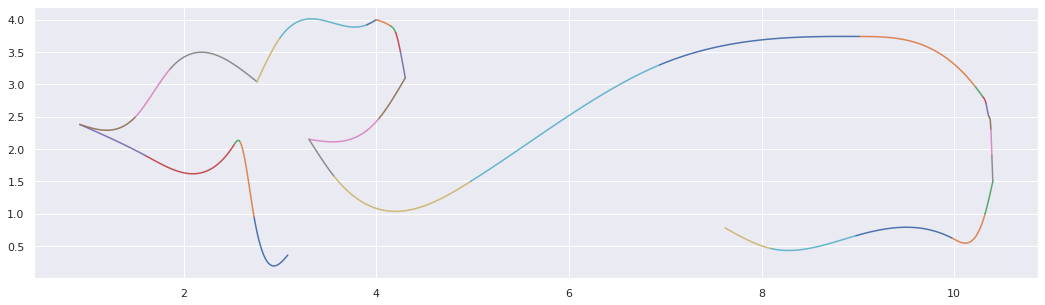

In [ ]:
plt.figure(figsize = (18,5))
sns.color_palette("colorblind")

for j, lista in enumerate(x):
  for i in range(len(lista)-1):
    x_dom = np.linspace(lista[i], lista[i+1], 50)
    plt.plot(x_dom, a[j][i] * (x_dom - lista[i]) ** 3 + b[j][i] * (x_dom - lista[i]) ** 2 + c[j][i] * (x_dom - lista[i]) + y[j][i])  

plt.show()

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)